In [2]:
import xarray as xr
import pandas as pd
import numpy as np
from siphon.catalog import TDSCatalog
import metpy
from metpy.units import units

In [3]:
# Create list of extreme precipitation days from PrecipData.py
times = ['1997-06-13T00:00:00.000000000', '1997-07-06T00:00:00.000000000',
         '1997-07-25T00:00:00.000000000', '1997-07-26T00:00:00.000000000',
         '1997-08-01T00:00:00.000000000', '1997-08-22T00:00:00.000000000',
         '1997-08-23T00:00:00.000000000', '1997-08-24T00:00:00.000000000',
         '1997-08-25T00:00:00.000000000', '1998-06-15T00:00:00.000000000',
         '1998-07-07T00:00:00.000000000', '1998-07-28T00:00:00.000000000',
         '1998-07-29T00:00:00.000000000', '1998-08-24T00:00:00.000000000',
         '1999-06-11T00:00:00.000000000', '1999-06-22T00:00:00.000000000',
         '1999-07-07T00:00:00.000000000', '1999-07-15T00:00:00.000000000',
         '1999-07-19T00:00:00.000000000', '1999-08-09T00:00:00.000000000',
         '2000-07-13T00:00:00.000000000', '2000-08-24T00:00:00.000000000',
         '2002-06-25T00:00:00.000000000', '2002-06-26T00:00:00.000000000',
         '2002-08-03T00:00:00.000000000', '2002-08-24T00:00:00.000000000',
         '2003-07-27T00:00:00.000000000', '2003-07-28T00:00:00.000000000',
         '2003-08-23T00:00:00.000000000', '2003-08-24T00:00:00.000000000',
         '2004-06-15T00:00:00.000000000', '2004-07-16T00:00:00.000000000',
         '2004-07-30T00:00:00.000000000', '2004-08-02T00:00:00.000000000',
         '2004-08-05T00:00:00.000000000', '2004-08-11T00:00:00.000000000',
         '2005-06-28T00:00:00.000000000', '2005-06-29T00:00:00.000000000',
         '2005-07-19T00:00:00.000000000', '2005-08-01T00:00:00.000000000',
         '2006-06-22T00:00:00.000000000', '2006-06-23T00:00:00.000000000',
         '2006-07-03T00:00:00.000000000', '2006-07-04T00:00:00.000000000',
         '2006-07-05T00:00:00.000000000', '2006-07-29T00:00:00.000000000',
         '2006-07-31T00:00:00.000000000', '2006-08-05T00:00:00.000000000',
         '2006-08-06T00:00:00.000000000', '2006-08-07T00:00:00.000000000',
         '2006-08-08T00:00:00.000000000', '2006-08-09T00:00:00.000000000',
         '2007-06-22T00:00:00.000000000', '2007-07-01T00:00:00.000000000',
         '2007-07-02T00:00:00.000000000', '2007-07-08T00:00:00.000000000',
         '2007-07-26T00:00:00.000000000', '2007-08-08T00:00:00.000000000',
         '2007-08-26T00:00:00.000000000', '2007-08-27T00:00:00.000000000',
         '2007-08-28T00:00:00.000000000', '2008-08-05T00:00:00.000000000',
         '2009-07-21T00:00:00.000000000', '2009-07-22T00:00:00.000000000',
         '2009-08-19T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
         '2010-07-24T00:00:00.000000000', '2011-07-06T00:00:00.000000000',
         '2011-08-28T00:00:00.000000000', '2012-08-30T00:00:00.000000000',
         '2013-06-16T00:00:00.000000000', '2013-07-19T00:00:00.000000000',
         '2013-08-01T00:00:00.000000000', '2013-08-23T00:00:00.000000000',
         '2014-07-22T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
         '2014-07-29T00:00:00.000000000', '2014-07-30T00:00:00.000000000',
         '2014-08-21T00:00:00.000000000', '2014-08-23T00:00:00.000000000',
         '2014-08-25T00:00:00.000000000', '2015-07-25T00:00:00.000000000',
         '2015-07-27T00:00:00.000000000', '2015-08-04T00:00:00.000000000',
         '2015-08-05T00:00:00.000000000', '2016-07-03T00:00:00.000000000',
         '2016-07-09T00:00:00.000000000', '2016-07-10T00:00:00.000000000',
         '2016-07-11T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
         '2016-08-02T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
         '2017-06-03T00:00:00.000000000', '2017-07-20T00:00:00.000000000',
         '2017-07-28T00:00:00.000000000', '2017-08-20T00:00:00.000000000',
         '2018-07-09T00:00:00.000000000', '2018-08-16T00:00:00.000000000',
         '2018-08-21T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
         '2019-07-28T00:00:00.000000000', '2019-07-29T00:00:00.000000000',
         '2019-07-31T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
         '2019-08-09T00:00:00.000000000', '2019-08-30T00:00:00.000000000']

In [4]:
# Format times as pandas datatime, making easier for xarray subsetting
time_formatted = pd.to_datetime(times)

In [5]:
def remote_data_grab(var, var_type, level=None, time_scale=None, time=time_formatted):
    """
    Grabs data from NCEP Reanalysis data given different variables and levels

    Input
    -------
    var = string of variable name (ex. temp)

    var_type = string with variable type (ex. precipitation)

    level (optional) = integer with pressure level (ex. 1000) in hPa

    time_scale (optional) = string detailing the time interval (can set to 'long_term'
                            mean)
    time (optional) = list of times for precipitation data

    Output
    --------
    ds = xarray dataset with seasonal average for JJA (June, July, August)

    """

    var_name =  {'temp':'air',
                 'height':'hgt',
                 'q':'shum',
                 'u_wind':'uwnd',
                 'v_wind':'vwnd',
                 'skin_temp':'skt.sfc.gauss',
                 'sfc_u_wind':'uwnd.sig995',
                 'sfc_v_wind':'vwnd.sig995'}

    # Setup data link
    if var != 'wind_spd':
        link = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Aggregations/ncep.reanalysis/'+var_type+'/'+var_name[var]+'.nc'

    if time_scale == 'long_term':

        # Create a new dictionary with variables for monthly data
        var_name =  {'temp':'air',
                     'height':'hgt',
                     'q':'shum',
                     'u_wind':'uwnd',
                     'v_wind':'vwnd',
                     'skin_temp':'skt',
                     'sfc_u_wind':'uwnd.sig995',
                     'sfc_v_wind':'vwnd.sig995',
                     'wind_spd' : 'wspd'}

        # Create link to data
        link = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/'+var_type+'/'+var_name[var]+'.mon.ltm.nc'

        # Add time subset
        ds = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.ltm.nc', use_cftime = True)
        time = (ds['time.season'] == 'JJA')

    # Deal with pressure levels
    if var_type == 'pressure':
        ds = xr.open_dataset(link, use_cftime = True).sel(time=time, level=level).metpy.parse_cf()

    # Calculate total column water vapor
    elif var_type == 'total_column':

        # Add new link
        try:
            link = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/'+var_name[var]+'.nc'

            # Open the dataset
            ds = xr.open_dataset(link).sel(time=time).metpy.parse_cf()

        except:
            link = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/'+var_name[var]+'.mon.ltm.nc'

            # Open the dataset and subset for given months, along with only the pressure levels from the other dataset
            ds = xr.open_dataset(link).sel(time=time).metpy.parse_cf()

        # Integrate total column water vapor
        ds = ds.sum('level')

    else:

        # Find average of skin temperature
        ds = xr.open_dataset(link).sel(time=time).metpy.parse_cf()

        # Set level to surface
        level = 'surface'

    # Make sure temperature is in degrees Celsius
    if var == 'temp':
        ds[var_name[var]].metpy.convert_units('degC')

    if var == 'q':
        ds[var_name[var]].metpy.convert_units('g/kg')

    try:

        # Give special name to total column specific humidity
        if var_type == 'total_column':
            ds = ds.rename({var_name[var]:'total_column_q'})

        else:

            # Rename the variable to contain the level
            ds = ds.rename({var_name[var]:var+'_'+str(level)})

    except:

        # Rename varaibles that have extra characters
        if var == 'skin_temp':
            var_name[var] = 'skt'

        elif var == 'sfc_u_wind':
            var_name[var] = 'uwnd'

        elif var == 'sfc_v_wind':
            var_name[var] = 'vwnd'

        # Rename variable
        ds = ds.rename({var_name[var]:var+'_'+str(level)})

    # Calcualte the seasonal average
    return ds.groupby('time.season').mean('time').squeeze()

def merge_datasets(var_type, time_scale=None):
    """
    Finds seasonal average then merges into a single dataset

    Input
    -------
    var_type = string detailing variable type ('pressure', 'surface_gauss', 'surface',
               or total_column)

    time_scale = flag to calculate long term mean instead of daily values (default daily values)

    Output
    -------
    ds = merged dataset with all variables

    """

    # Create a list for the datasets
    datasets = []

    # Pressure variables
    atmos_vars = {250:['u_wind', 'v_wind'],
                  500:['u_wind', 'v_wind', 'height'],
                  850:['temp', 'q', 'u_wind', 'v_wind']}

    # Gaussian surface variables
    surface_gaussian = ['skin_temp']

    # Surface variables
    surface = ['sfc_u_wind', 'sfc_v_wind']

    if var_type == 'pressure':
        
        if time_scale is None:
            u = remote_data_grab('u_wind', 'pressure', '250', time_scale)
            v = remote_data_grab('v_wind', 'pressure', '250', time_scale)
            uv = xr.merge([u,v])
            uv['wind_spd_250'] = np.sqrt(uv['u_wind_250'] * uv['u_wind_250'] + uv['v_wind_250'] * uv['v_wind_250'])
            datasets.append(uv.drop_vars(['u_wind_250', 'v_wind_250']))
            print('Done with wsp 250')
        else:
            datasets.append(remote_data_grab('wind_spd', var_type, '250', time_scale))
            print('Done with wsp 250')
        
        levels = [250, 500, 850]

        for lev in levels:
            for var in atmos_vars[lev]:
                datasets.append(remote_data_grab(var, var_type, lev, time_scale))
                print('Done with ', var, ' ', lev)
        
    elif var_type == 'surface_gauss':
        for var in surface_gaussian:
            datasets.append(remote_data_grab(var, var_type, None, time_scale))
            print('Done with ', var)

    elif var_type == 'surface':
        for var in surface:
            datasets.append(remote_data_grab(var, var_type, None, time_scale))
            print('Done with ', var)

    elif var_type == 'total_column':
        datasets.append(remote_data_grab('q', var_type, None, time_scale))
        print('Done with Total Column Water Vapor')

    else:
        print('Error!')

    return xr.merge(datasets, compat='override')

def anomaly(var_type):
    """
    Calculates the averages, anomaly, and saves them to a netcdf file

    Input
    ------
    var_type = string with variable type ('pressure', 'surface_gauss', 'surface',
               or 'total_column')

    Output
    -------
    Saved netcdf file for seasonal average (JJA) for long term mean, extreme precipitation
    days, and anomalies (extreme precipitation - long term mean)

    """

    # Dataset with extreme precipitation days
    extreme_precip_ds = merge_datasets(var_type)

    # Dataset with long-term seasonal average
    long_term_average = merge_datasets(var_type, 'long_term').drop('valid_yr_count')

    # Calculate the anomaly
    anomaly = extreme_precip_ds - long_term_average

    # Save the datasets to netcdf so they can be plotted later
    extreme_precip_ds.drop('crs').to_netcdf(var_type + '_extreme_precip_mean.nc')
    long_term_average.drop('crs').to_netcdf(var_type + '_long_term_mean.nc')
    anomaly.drop('crs').to_netcdf(var_type + '_anomaly.nc')

    return print('Done with all ', var_type, 'variables')

In [ ]:
# Run the anomaly calculations

# Find anomalies for all the pressure level data (ex. 850 winds)
anomaly('pressure')

In [3]:
test = xr.open_dataset('pressure_anomaly.nc')
test1 = xr.open_dataset('pressure_extreme_precip_mean.nc')
test2 = xr.open_dataset('pressure_long_term_mean.nc')

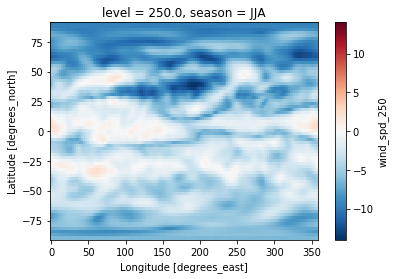

In [4]:
test['wind_spd_250'].plot()